In [19]:
import csv
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
headers = ['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our', 'word_freq_over', 
           'word_freq_remove', 'word_freq_internet', 'word_freq_order', 'word_freq_mail', 'word_freq_receive',
           'word_freq_will', 'word_freq_people', 'word_freq_report', 'word_freq_addresses', 'word_freq_free', 
           'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit', 'word_freq_your',
           'word_freq_font', 'word_freq_000', 'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
           'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet', 'word_freq_857', 'word_freq_data',
           'word_freq_415', 'word_freq_85', 'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
           'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting', 'word_freq_original',
           'word_freq_project', 'word_freq_re', 'word_freq_edu', 'word_freq_table', 'word_freq_conference',
           'char_freq_;', 'char_freq_(', 'char_freq_[', 'char_freq_!', 'char_freq_$', 'char_freq_#', 
           'capital_run_length_average', 'capital_run_length_longest', 'capital_run_length_total', 'output'
          ]

In [10]:
with open('spambase.txt', 'r') as file:
    rows = [line.strip().split(',') for line in file]

In [11]:
with open('data.csv', 'w', newline='') as file:
    # Create a CSV writer object
    writer = csv.writer(file)
    
    writer.writerow(headers)

    # Write the rows to the CSV file
    for row in rows:
        writer.writerow(row)

In [13]:
dataframe = pd.read_csv('dataset\data.csv')

In [14]:
dataframe.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,output
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [15]:
X = dataframe.drop(['output'], axis=1)

In [16]:
X.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191


In [17]:
y = dataframe['output']

In [18]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: output, dtype: int64

In [87]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

In [88]:
len(train_X), len(train_y), len(test_X), len(test_y)

(3680, 3680, 921, 921)

In [89]:
from sklearn.neighbors import KNeighborsClassifier

In [90]:
knn = KNeighborsClassifier(n_neighbors=1)

In [91]:
knn.fit(train_X, train_y)

KNeighborsClassifier(n_neighbors=1)

In [92]:
knn_pred = knn.predict(test_X)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [93]:
knn_acc = metrics.accuracy_score(test_y, knn_pred)

In [94]:
knn_acc

0.8078175895765473

In [95]:
knn_cm = confusion_matrix(test_y, knn_pred)

In [96]:
from sklearn.model_selection import cross_val_score

In [97]:
neighbors = list(range(1, 50))

In [98]:
cv_scores = []
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, train_X, train_y, cv=5) 
    mean_score = scores.mean()
    cv_scores.append(mean_score)
best_k = neighbors[cv_scores.index(max(cv_scores))]

In [99]:
best_k

1

In [100]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [101]:
dt = DecisionTreeClassifier(random_state=42)

In [102]:
dt.fit(train_X, train_y)

DecisionTreeClassifier(random_state=42)

In [103]:
dt_pred = dt.predict(test_X)

In [104]:
dt_acc = accuracy_score(test_y, dt_pred)

In [105]:
dt_acc

0.9185667752442996

In [106]:
dt_cm = confusion_matrix(test_y, dt_pred)

In [107]:
from sklearn.decomposition import PCA

In [108]:
pca = PCA(n_components=0.95, random_state=42)
pca.fit(train_X)

PCA(n_components=0.95, random_state=42)

In [109]:
train_X_pca = pca.transform(train_X)
test_X_pca = pca.transform(test_X)

In [110]:
knn_pca = KNeighborsClassifier(n_neighbors=1)
knn_pca.fit(train_X_pca, train_y)

KNeighborsClassifier(n_neighbors=1)

In [111]:
knn_pred_pca = knn_pca.predict(test_X_pca)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [112]:
knn_acc_pca = accuracy_score(test_y, knn_pred_pca)

In [113]:
knn_acc_pca

0.753528773072747

In [114]:
knn_cm_pca = confusion_matrix(test_y, knn_pred_pca)

In [115]:
dt_pca = DecisionTreeClassifier(random_state=42)
dt_pca.fit(train_X_pca, train_y)

DecisionTreeClassifier(random_state=42)

In [116]:
dt_pred_pca = dt_pca.predict(test_X_pca)

In [117]:
dt_acc_pca = accuracy_score(test_y, dt_pred_pca)

In [118]:
dt_acc_pca

0.745928338762215

In [119]:
dt_cm_pca = confusion_matrix(test_y, dt_pred_pca)

In [120]:
print('Accuracy using KNN model before PCA      :', accuracy)
print('Accuracy using KNN model after PCA       :', knn_acc_pca)
print('Accuracy using Decision Trees before PCA :', dt_acc)
print('Accuracy using Decision Trees after PCA  :', dt_acc_pca)

Accuracy using KNN model before PCA      : 0.8078175895765473
Accuracy using KNN model after PCA       : 0.753528773072747
Accuracy using Decision Trees before PCA : 0.9185667752442996
Accuracy using Decision Trees after PCA  : 0.745928338762215


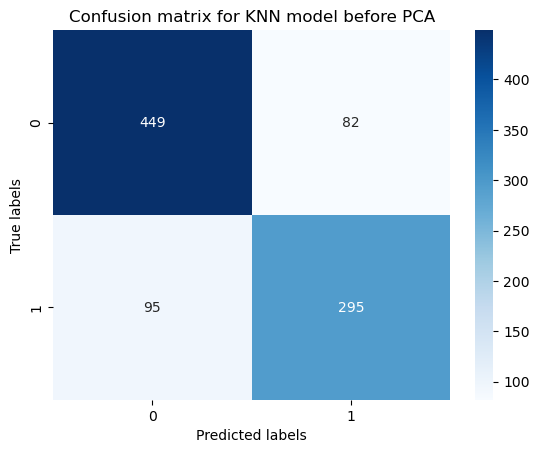

In [123]:
sns.heatmap(knn_cm, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion matrix for KNN model before PCA')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

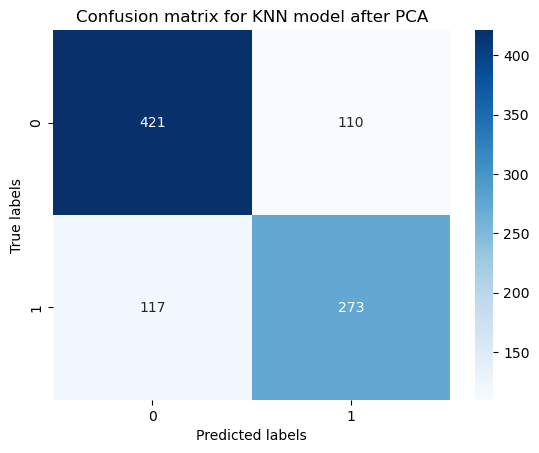

In [125]:
sns.heatmap(knn_cm_pca, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion matrix for KNN model after PCA')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

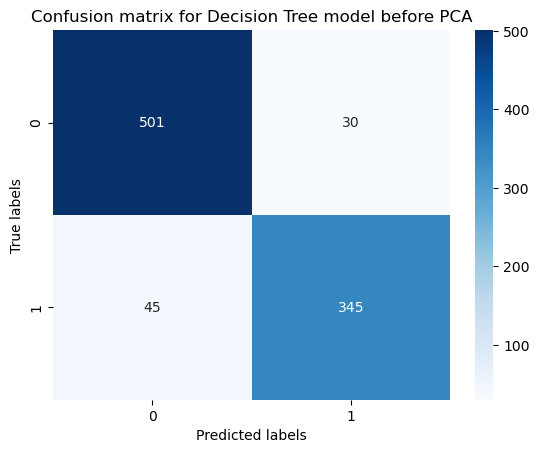

In [126]:
sns.heatmap(dt_cm, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion matrix for Decision Tree model before PCA')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

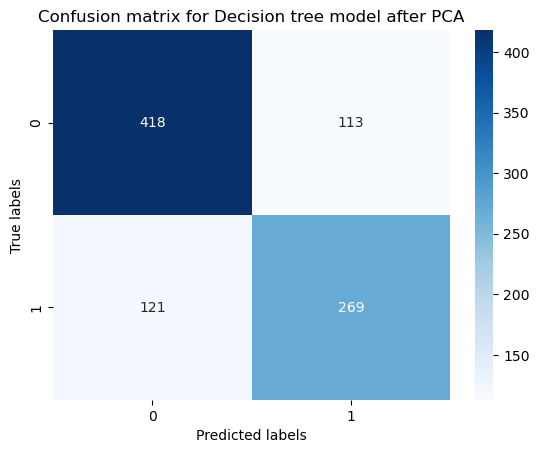

In [127]:
sns.heatmap(dt_cm_pca, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion matrix for Decision tree model after PCA')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()